In [42]:
import random
import math

# Parameters

In [43]:
K = 3
min_range = -10.0
max_range = 10.0
N = 200
epochs = 100

In [247]:
myx = getX(K)
myA = getMatrix(K)
myB = getMatrix(K)
myC = getMatrix(K)

# Helper Functions

In [44]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

sigmoid(0)
# Expected: 0.5

0.5

In [45]:
def vectorAddition(a, b):
    
    temp = []
    
    for i in range(len(a)):
        temp.append(a[i] + b[i])
        
    return temp

vectorAddition([1,2,5],[1,4,4])
# Expected: [2, 6, 9]

[2, 6, 9]

In [46]:
def twoNorm(v):
    
    temp = 0
    
    for i in v:
        temp += i**2
        
    return math.sqrt(temp)

twoNorm([1,2,3,4])
# Expected: 5.477

5.477225575051661

In [47]:
def matrixVectorMulti(M,v):
    
    mult = []
    
    for row in M:
        temp = 0
        for i in range(len(v)):
            temp += row[i] * v[i]
        mult.append(temp)
        
    return mult

matrixVectorMulti([[1,2],[3,4]],[5,6])
# Expected: [17,39]

[17, 39]

In [142]:
def matrixTranspose(M): #For KXK MATRICES
    
    trans = []
    
    for i in range(len(M)):
        temp = []
        for j in range(len(M[0])):
            temp.append(M[j][i])
        trans.append(temp)
        
    return trans
            
matrixTranspose([[1,2,5],[3,4,6],[2,3,4]])     
# Expected: [[1,3,2],[2,4,3],[5,6,4]]

[[1, 3, 2], [2, 4, 3], [5, 6, 4]]

In [143]:
def vectorTranspose(v): #FOR KX1 VECTORS
    
    trans = []
    
    for elem in v:
        trans.append([elem])
        
    return trans


vectorTranspose([1,2,4])
#Expected [[1],[2],[4]]

[[1], [2], [4]]

In [158]:
def vectorMatrixMulti(v, M):
    
    mult = []
    
    M = matrixTranspose(M)
    
    return matrixVectorMulti(M,v)
    
    
vectorMatrixMulti([5,6], [[1,2],[3,4]] )
# Expected: [23,34]

[23, 34]

In [101]:
def matrixScalarMulti(s,M):
    
    mult = []
    
    for row in M:
        temp = []
        for entry in row:
            temp.append(s*entry)

        mult.append(temp)
        
    return mult

matrixScalarMulti(6, [[1,2],[3,4]])
# Expected: [[6,12],[18,24]]

[[6, 12], [18, 24]]

In [103]:
def scalarVectorMulti(s,v):
    
    mult = []
    
    for elem in v:
        mult.append(elem*s)
        
    return mult

scalarVectorMulti(6, [1,2,3,4])
# Expected: [6,12,18,24]

[6, 12, 18, 24]

In [49]:
def matrixAddition(M, Q):
    
    addit = []
    
    for i in range(K):
        temp = []
        for j in range(K):
            temp.append(M[i][j]+Q[i][j])
        addit.append(temp)
        
    return addit

matrixAddition([[1,2,5],[3,4,10],[4,6,8]], [[6,7,1],[8,9,-1],[4,1,2]])
# Expected: [[7,9,6],[11,13,9],[8,7,10]]

[[7, 9, 6], [11, 13, 9], [8, 7, 10]]

In [50]:
def numpyMatrixToPythonMatrix(M):
    
    return_M = []
    
    for row in M:
        temp = []
        for elem in row:
            temp.append(elem.item())
        return_M.append(temp)
        
    return return_M

In [152]:
def vectorMultiplication(v,u): #FOR Kx1 and 1xK vectors
    
    mult = []
    
    for i in range(K):
        temp = []
        for j in range(K):
            temp.append(v[i]*u[j])
        mult.append(temp)
        
    return mult

vectorMultiplication([1,2,3],[4,5,6])
# Expected: [[4,5,6],[8,10,12],[12,15,18]]

[[4, 5, 6], [8, 10, 12], [12, 15, 18]]

# Getter Functions

In [51]:
def getX(K):
    
    X = []
    
    for i in range(K):
        X.append(random.uniform(min_range, max_range))
    
    return X

getX(3)

[9.372830266985005, -6.2381648405851875, -8.767937119632407]

In [52]:
def getMatrix(K):
    
    M = []
    
    for i in range(K):
        temp = []
        for j in range(K):
            temp.append(random.uniform(-10,10))
        M.append(temp)
    
    return M

getMatrix(3)

[[6.972764653097556, 5.195677214931187, -5.774738514184554],
 [-0.36788951274215265, 0.3301450710328737, -1.0525819132570717],
 [5.799557820820159, 9.37171334239537, -8.118318837912849]]

# Forward Propagation

In [248]:
def forwardPropagation(x, A, B, C, details=True):
   
    if details: print("________________________ INPUT")
    
    if details: print("x:" + str(x)) # (Kx1)
    if details: print("A:" + str(A)) # (KxK)
    if details: print("B:" + str(B)) # (KxK)
    if details: print("C:" + str(C)) # (KxK)
    
    if details: print("________________________ FORWARD PROPAGATION OUTPUT")
    
    y = [] # y = Ax (Kx1)
    u = [] # u = sigmoid(y) (Kx1)
    v = [] # v = Bx (Kx1)
    z = [] # z = u+v (Kx1)
    w = [] # w = Cz (Kx1)
    L = 0 # L = twoNorm(w) (1D)
    
    y = matrixVectorMulti(A,x) #(Kx1)
    if details: print("y:" + str(y))
    
    u = [sigmoid(j) for j in y] #(Kx1)
    if details: print("u:" + str(u))
    
    v = matrixVectorMulti(B,x) #(Kx1)
    if details: print("v:" + str(v))
    
    z = vectorAddition(u, v) #(Kx1)
    if details: print("z:" + str(z))
    
    w = matrixVectorMulti(C,z) #(Kx1)
    if details: print("w:" + str(w))

    L = twoNorm(w)
    if details: print("L: " + str(L))
    
    return (y,u,v,z,w,L)
    

In [249]:
(y,u,v,z,w,L) = forwardPropagation(myx, myA, myB, myC)

________________________ INPUT
x:[-4.884534147348429, 0.6546589277511128, 0.9495175764626644]
A:[[-6.955662661216982, 3.6518412372982194, 1.8464775598440788], [-6.6483058220877345, -7.079956127264673, -8.192968599988964], [-3.0894204152414773, 4.154589906706425, -2.8376010008679557]]
B:[[-3.5743818703670343, 4.986289383013766, 1.2497996762129482], [0.9263896732760166, 7.091144521328246, 2.400178044643946], [0.20795323124359655, 2.909184022234175, -7.529979531170314]]
C:[[-6.299943937018233, 2.418856669142542, -5.543187561000051], [8.90282688111948, 8.028711278803272, 1.8056526647721043], [-1.5699064897302222, 5.461613321811718, -5.780996035940353]]
________________________ FORWARD PROPAGATION OUTPUT
y:[38.11914515249359, 20.059552634106666, 15.11586686202021]
u:[1.0, 0.9999999980580101, 0.9999997275653681]
v:[21.910215922033014, 2.3963103160224857, -6.261079281684604]
z:[22.910215922033014, 3.3963103140804956, -5.261079554119236]
w:[-106.9547372982738, 221.73399877142757, 12.9967170463

# Backward Propagation

In [241]:
def backwardPropagation(x, A, B, C, details=True):
    
    (y, u, v, z, w, L) = forwardPropagation(x, A, B, C)
    
    h_e0 = x
    
    a_e05 = y + v
    
    h_e05 = a_e05
    
    a_e1 = y + v
    
    h_e1 = u 
    
    a_e2 = z
    
    h_e2 = a_e2
    
    a_e3 = w
    
    h_e3 = a_e3
    
    print("________________________ BACKWARD PROPAGATION OUTPUT")
    
    dL = 1
    
    dw =  scalarVectorMulti(2, h_e3)

    dz = vectorMatrixMulti( dw , C)
    
    dC = vectorMultiplication( dw , h_e2)
        
    du = dz
    
    dv = dz
    
    dy = vectorMatrixMulti (du, vectorMultiplication ( vectorAddition([1]*K, scalarVectorMulti(-1, u)), h_e1))
    
    dA = vectorMultiplication (dy, h_e0)
    
    dB = vectorMultiplication (dv, h_e0)
    
    dA =  matrixScalarMulti ( 1/10**K, dA)
    dB =  matrixScalarMulti ( 1/10**K, dB)
    dC =  matrixScalarMulti ( 1/10**K, dC)
    
    
    if details: print("\nA.grad :", dA, "\n")
    if details: print("\nB.grad :", dB, "\n")
    if details: print("\nC.grad :", dC, "\n")


In [250]:
backwardPropagation(myx, myA, myB, myC)

________________________ INPUT
x:[-4.884534147348429, 0.6546589277511128, 0.9495175764626644]
A:[[-6.955662661216982, 3.6518412372982194, 1.8464775598440788], [-6.6483058220877345, -7.079956127264673, -8.192968599988964], [-3.0894204152414773, 4.154589906706425, -2.8376010008679557]]
B:[[-3.5743818703670343, 4.986289383013766, 1.2497996762129482], [0.9263896732760166, 7.091144521328246, 2.400178044643946], [0.20795323124359655, 2.909184022234175, -7.529979531170314]]
C:[[-6.299943937018233, 2.418856669142542, -5.543187561000051], [8.90282688111948, 8.028711278803272, 1.8056526647721043], [-1.5699064897302222, 5.461613321811718, -5.780996035940353]]
________________________ FORWARD PROPAGATION OUTPUT
y:[38.11914515249359, 20.059552634106666, 15.11586686202021]
u:[1.0, 0.9999999980580101, 0.9999997275653681]
v:[21.910215922033014, 2.3963103160224857, -6.261079281684604]
z:[22.910215922033014, 3.3963103140804956, -5.261079554119236]
w:[-106.9547372982738, 221.73399877142757, 12.9967170463

# torch.autograd

In [243]:
import torch

In [251]:
def backwardPropagation_Torch(x, A, B, C, details=True):
    
    x_torch = torch.tensor(x)
    A_torch = torch.tensor(A, requires_grad=True)
    B_torch = torch.tensor(B, requires_grad=True)
    C_torch = torch.tensor(C, requires_grad=True)

    m = torch.nn.Sigmoid()

    if details: print("________________________ INPUT")
    
    if details: print("x:" + str(x_torch)) # (Kx1)
    if details: print("A:" + str(A_torch)) # (KxK)
    if details: print("B:" + str(B_torch)) # (KxK)
    if details: print("C:" + str(C_torch)) # (KxK)

    if details: print("___________________________________________ FORWARD")

    y_torch = torch.matmul(A_torch, x_torch)
    if details: print("y:" + str(y_torch))

    u_torch = m(y_torch)
    if details: print("u:" + str(u_torch))

    v_torch = torch.matmul(B_torch, x_torch)
    if details: print("v:" + str(v_torch))

    z_torch = torch.add(u_torch, v_torch)
    if details: print("z:" + str(z_torch))

    w_torch = torch.matmul(C_torch, z_torch)
    if details: print("w:" + str(w_torch))

    L_torch = torch.norm(w_torch)
    if details: print("L:" + str(L_torch))


    L_torch_total = torch.norm( torch.matmul(C_torch, torch.add(m(torch.matmul(A_torch, x_torch)), torch.matmul(B_torch, x_torch))) )
    if details: print("L_totalizer:" + str(L_torch))

    L_torch_total.backward()

    if details: print("___________________________________________ BACKWARD")

    gradient_A = A_torch.grad.cpu().detach().numpy()
    gradient_B = B_torch.grad.cpu().detach().numpy()
    gradient_C = C_torch.grad.cpu().detach().numpy()
    if details: print("\nA.grad :", gradient_A, "\n")
    if details: print("B.grad :", gradient_B, "\n")
    if details: print("C.grad :", gradient_C, "\n")
        
    return_A = numpyMatrixToPythonMatrix(gradient_A)
    return_B = numpyMatrixToPythonMatrix(gradient_B)
    return_C = numpyMatrixToPythonMatrix(gradient_C)
    
    return (return_A, return_B, return_C)

In [252]:
(dA, dB, dC) = backwardPropagation_Torch(myx, myA , myB , myC)

________________________ INPUT
x:tensor([-4.8845,  0.6547,  0.9495])
A:tensor([[-6.9557,  3.6518,  1.8465],
        [-6.6483, -7.0800, -8.1930],
        [-3.0894,  4.1546, -2.8376]], requires_grad=True)
B:tensor([[-3.5744,  4.9863,  1.2498],
        [ 0.9264,  7.0911,  2.4002],
        [ 0.2080,  2.9092, -7.5300]], requires_grad=True)
C:tensor([[-6.2999,  2.4189, -5.5432],
        [ 8.9028,  8.0287,  1.8057],
        [-1.5699,  5.4616, -5.7810]], requires_grad=True)
___________________________________________ FORWARD
y:tensor([38.1191, 20.0596, 15.1159], grad_fn=<MvBackward0>)
u:tensor([1.0000, 1.0000, 1.0000], grad_fn=<SigmoidBackward0>)
v:tensor([21.9102,  2.3963, -6.2611], grad_fn=<MvBackward0>)
z:tensor([22.9102,  3.3963, -5.2611], grad_fn=<AddBackward0>)
w:tensor([-106.9547,  221.7340,   12.9967], grad_fn=<MvBackward0>)
L:tensor(246.5242, grad_fn=<CopyBackwards>)
L_totalizer:tensor(246.5242, grad_fn=<CopyBackwards>)
___________________________________________ BACKWARD

A.grad : [[

# Stochastic Gradient Descent

In [60]:
def getData(N):
    data = []
    
    for i in range(N):
        data.append(getX(K))
        
    return data

In [61]:
x_data = getData(N)
x_data

[[2.1915884612072905, -2.1504399580042914, 9.66038066002653],
 [-1.95035448499749, -5.954229656226193, -9.018796628109577],
 [-7.6530467571881005, 0.806474648095989, 2.230275625136013],
 [-0.696210609354841, -0.19250202747803868, 3.7314984260046007],
 [-0.8884420810741549, 2.3239110214902077, 0.15529960834401102],
 [3.2075718686668857, 7.219883498657847, 7.495778280062922],
 [-1.5406274091823118, 3.4738022111981053, -0.6574688153398629],
 [0.06264588496802226, -6.1523095487162145, -3.431074719547846],
 [-6.752521952768036, 7.52723809446141, 3.5845157656971605],
 [-6.280591861308786, 8.195601058128563, -5.008813512932447],
 [1.2856051104466442, 9.52773027062982, -1.929100829446595],
 [3.388164574496882, -1.3057208277852101, -5.824149142050881],
 [-9.30025102554097, 3.134151161882887, 0.7030576167781177],
 [-0.6901692477934098, 2.133401625223561, 3.696004911666096],
 [-1.2267860258218928, -7.950217310998426, 0.7688865116609396],
 [6.446889968035514, -9.96170824838105, 1.7841528747720723]

In [73]:
def getLoss(xes, A, B, C):
    
    temp = 0
    
    for xi in xes:
        (y,u,v,z,w,L) = forwardPropagation(xi,A,B,C,False)
        temp += L
    
    return temp

In [74]:
def GradientDescent(xes, A, B, C, learning_rate, epochs, details=False):
    
    training_loss = []
    
    # START FROM A RANDOM NON-ZERO THETA _____________________
    
    theta_A = getMatrix(K)
    theta_B = getMatrix(K)
    theta_C = getMatrix(K)
        
    if details:
        print("Random Theta_A: ", theta_A, "\n\n", "Random Theta_B: ", theta_B, "\n\n", "Random Theta_C: ", theta_C, "\n\n")
        loss = getLoss(xes, theta_A, theta_B, theta_C)
        training_loss.append(loss)
        print("Loss: "+ str(round(loss, 5)))
    
    # UPDATE THETA EPOCHS TIMES ______________________________
    
    for k in range(epochs):
        
        if details: print("_______________________________________________________________")
        
        summation_A = [[0] * K] * K
        summation_B = [[0] * K] * K
        summation_C = [[0] * K] * K
        
        for x in xes:          
            (gradient_A, gradient_B, gradient_C) = backwardPropagation_Torch(x, theta_A, theta_B, theta_C, details=False)
            summation_A = matrixAddition(summation_A, gradient_A)
            summation_B = matrixAddition(summation_B, gradient_B)
            summation_C = matrixAddition(summation_C, gradient_C)
            
        theta_A = matrixAddition(matrixScalarMulti(-learning_rate/N, summation_A), theta_A)
        theta_B = matrixAddition(matrixScalarMulti(-learning_rate/N, summation_B), theta_B)
        theta_C = matrixAddition(matrixScalarMulti(-learning_rate/N, summation_C), theta_C)
        
        if details: 
            print("Epoch: "+str(k))
            print("Theta_A: ", theta_A, "\n\n", "Theta_B: ", theta_B, "\n\n", "Theta_C: ", theta_C, "\n\n")
            loss = getLoss(xes, theta_A, theta_B, theta_C)
            training_loss.append(loss)
            print("Loss: "+ str(round(loss, 5)))
        
    return (theta_A, theta_B, theta_C, training_loss)

In [75]:
(estim_A, estim_B, estim_C, training_loss) = GradientDescent(x_data, A, B, C, 0.01, epochs, True)

Random Theta_A:  [[-2.4629860673524373, -9.656075479956158, 3.847107232866829], [5.943889807597952, -2.359623136493491, -1.5680192194169003], [1.6114018689908445, -7.994073227574329, -7.323481306128244]] 

 Random Theta_B:  [[-3.1441580793581014, -3.9708901623084136, 3.150329321544092], [-1.0279942747204824, 8.134427534862517, 7.901060588321055], [-8.037243455836458, -5.651707013123057, -4.998902887353715]] 

 Random Theta_C:  [[-1.367584634168857, 2.2952478153348856, 2.6203190444013025], [-6.582432515475807, -2.4940874147830723, -1.4468196460231315], [-8.037115306835696, 1.8936839662649536, -7.907220986633606]] 


Loss: 151828.43767
_______________________________________________________________
Epoch: 0
Theta_A:  [[-2.4610667596956395, -9.656608294913822, 3.8470202502171027], [5.943625033069094, -2.3600813605047795, -1.5683602859406216], [1.614022863182454, -7.993286902355975, -7.323763211608971]] 

 Theta_B:  [[-2.837877353582442, -3.637486325241525, 3.1267772900561206], [-1.0212264

Epoch: 11
Theta_A:  [[-2.4426624865686746, -9.66242074013441, 3.8443814711655175], [5.943727607443294, -2.3591389275253474, -1.5693636323806661], [1.6331234611585506, -7.986862249659832, -7.326554964079277]] 

 Theta_B:  [[0.22588530455370992, -0.8110429427466277, 2.136550484314327], [-0.47753499465306803, 7.852881372981848, 7.460561970570489], [-5.385063074951416, -3.7304288100707748, -4.814360552159508]] 

 Theta_C:  [[-1.2386557032680747, 1.3654870467777347, 1.8842203439212795], [-5.52740661540454, -0.771787437046309, -1.431708755470247], [-6.726207147902233, -1.3361731968068067, -3.3499491627968827]] 


Loss: 28305.23945
_______________________________________________________________
Epoch: 12
Theta_A:  [[-2.441375669941743, -9.662916725939512, 3.8439620689337786], [5.943948665471522, -2.358648659333868, -1.5692404969079903], [1.6341367194535072, -7.986356418990754, -7.326882783150272]] 

 Theta_B:  [[0.466650691162698, -0.6293638389239359, 1.9540703476873682], [-0.3962959021890913

_______________________________________________________________
Epoch: 24
Theta_A:  [[-2.4392445070872903, -9.664250091932542, 3.841819080118962], [5.945367833631501, -2.3558902887207163, -1.5679904853098652], [1.6419435660974147, -7.983618141846851, -7.328071652479493]] 

 Theta_B:  [[1.4741252882288378, 0.37910228043263405, 0.8997208522215473], [0.21497275606883645, 7.838622448659335, 7.296822764679338], [-4.203894543148071, -3.5387187366565773, -5.181524833674273]] 

 Theta_C:  [[-0.6677663327314057, 0.32439078394397014, 0.4004458392616519], [-5.273840698054554, -0.7458503975735832, -1.5617862800575322], [-6.7516887054050265, -1.1954358586927776, -2.340796946410064]] 


Loss: 6354.17813
_______________________________________________________________
Epoch: 25
Theta_A:  [[-2.439436198366762, -9.664463281223147, 3.8411386112798294], [5.945145630185554, -2.356350751314101, -1.5681676260130277], [1.6416583568854028, -7.983827333989949, -7.327903081907704]] 

 Theta_B:  [[1.3449378265382

Epoch: 36
Theta_A:  [[-2.44346476877904, -9.662908890331208, 3.842191557303304], [5.9449053158122345, -2.3568663386090387, -1.56834047852496], [1.644577277959962, -7.98321514251852, -7.327831745514598]] 

 Theta_B:  [[1.4189670364556446, 0.4052824032646566, 0.9008025953303314], [0.21594811883346135, 7.720494382934618, 7.223164382834328], [-4.129145066379529, -3.4796388394939326, -5.121980901328625]] 

 Theta_C:  [[-0.4280625244110861, -0.06402551661600508, -0.12340521340854838], [-5.141735058960014, -0.845701559073929, -1.6560748437714528], [-6.7099492292847875, -1.1072877970257438, -2.169447198356081]] 


Loss: 5689.29995
_______________________________________________________________
Epoch: 37
Theta_A:  [[-2.4432542531175088, -9.663347987183961, 3.841186181317578], [5.944676204724525, -2.3573319641132313, -1.5685375158248605], [1.6438308002910627, -7.9832161750157375, -7.327999246052724]] 

 Theta_B:  [[1.3160173600552216, 0.08167046789051585, 0.6669543691109157], [0.1989978205990135

Epoch: 48
Theta_A:  [[-2.4473016616466223, -9.66178854636711, 3.842221566894782], [5.944417420329937, -2.3578629126686494, -1.5687560344392086], [1.6463410681558437, -7.982750039908088, -7.3278464170024415]] 

 Theta_B:  [[1.4172233520624773, 0.39207999567063145, 0.8950162859375811], [0.1800412379849791, 7.607297908428284, 7.1409543142478595], [-4.104458271145593, -3.4053865719536867, -5.06634719875321]] 

 Theta_C:  [[-0.41627632618273436, -0.0684469236066673, -0.1338780926979068], [-5.062108378534065, -0.8321999570389131, -1.628059263105341], [-6.608986186264239, -1.0864964400456882, -2.1255631719615757]] 


Loss: 5576.1932
_______________________________________________________________
Epoch: 49
Theta_A:  [[-2.44710023203128, -9.66221773741932, 3.841235080270072], [5.944192520021556, -2.3583183714293354, -1.5689507841198789], [1.6455338087483962, -7.982588070145199, -7.3282124016624675]] 

 Theta_B:  [[1.313085393136515, 0.08298592613758138, 0.6528522587548232], [0.16292123917826407

Epoch: 60
Theta_A:  [[-2.4511307222419467, -9.660671020140278, 3.842252616511273], [5.943936435848128, -2.3588422679317853, -1.5691682383320762], [1.647927254818382, -7.981965280881478, -7.328265787673912]] 

 Theta_B:  [[1.4118958323297637, 0.3780361336913854, 0.8829578642334079], [0.14374428109453014, 7.496188711186658, 7.058228463776749], [-4.081020431335043, -3.332657511551173, -5.012895564190078]] 

 Theta_C:  [[-0.4098658452689988, -0.06691412321895976, -0.1316684699506639], [-4.9841534330374415, -0.8137046868399569, -1.6011486033567923], [-6.507209792760134, -1.0623563455154783, -2.0904270544894725]] 


Loss: 5316.81011
_______________________________________________________________
Epoch: 61
Theta_A:  [[-2.4509389372136243, -9.661090164434004, 3.841285076174641], [5.943716913191563, -2.3592866976231943, -1.5693583132565982], [1.6472127931775364, -7.98198252844765, -7.328407866893685]] 

 Theta_B:  [[1.31138124043621, 0.06919879733891782, 0.6500834947924351], [0.1273344346739440

Epoch: 72
Theta_A:  [[-2.455017559513359, -9.659533994850264, 3.842290108006486], [5.943463185668963, -2.359805547346906, -1.5695737891509098], [1.6495650200412346, -7.981376984513466, -7.328452247561653]] 

 Theta_B:  [[1.4037897784871598, 0.37186124988915026, 0.8688231491382454], [0.10805926179588728, 7.387399368471998, 6.976571426596834], [-4.059278008088986, -3.258293128411711, -4.961215193023312]] 

 Theta_C:  [[-0.4035205534241007, -0.06566236825938601, -0.1294724760641775], [-4.906991909033464, -0.7984840782082023, -1.5744436963673447], [-6.406469203455655, -1.0424845334994273, -2.055561895649856]] 


Loss: 5150.7305
_______________________________________________________________
Epoch: 73
Theta_A:  [[-2.4548360794649757, -9.659943007917294, 3.841341339505767], [5.9432483426666245, -2.3602420361395366, -1.5697582648809207], [1.6488634724120383, -7.981394984405176, -7.328591056909645]] 

 Theta_B:  [[1.3078888589141509, 0.06081620215000211, 0.6480870308543776], [0.092453906799861

Epoch: 84
Theta_A:  [[-2.459029953473676, -9.658354510687392, 3.8423394007951632], [5.942996923518438, -2.36075592202607, -1.5699718316129978], [1.6512525954165165, -7.980978731429173, -7.32841448224166]] 

 Theta_B:  [[1.3922299703908705, 0.3580525953588038, 0.865521333588216], [0.07382421546095007, 7.278805589105348, 6.897082560615582], [-4.04022270903192, -3.18794814833203, -4.906767342857423]] 

 Theta_C:  [[-0.3972794085440711, -0.06452479042619731, -0.12723068453092945], [-4.831096677150236, -0.7846505309854017, -1.547182806835067], [-6.307382014819611, -1.0244238488546238, -2.019970332844438]] 


Loss: 5007.5252
_______________________________________________________________
Epoch: 85
Theta_A:  [[-2.4588595341250272, -9.65875329497204, 3.8414091903476058], [5.9427861711955545, -2.361183970684533, -1.570152777461041], [1.6505629595866194, -7.980996036173713, -7.328551543783292]] 

 Theta_B:  [[1.297812325028851, 0.05181840350301553, 0.6481992878700826], [0.05848921776712828, 7.22

Epoch: 96
Theta_A:  [[-2.4628417113346313, -9.657242813384295, 3.8423748392129515], [5.942538327780285, -2.36168875751855, -1.5703647850551898], [1.6526876404606994, -7.980085897368372, -7.328996010255561]] 

 Theta_B:  [[1.386932590111866, 0.34814680557073646, 0.8512258079315757], [0.039440840236292726, 7.1728058131262395, 6.817310454282319], [-4.018159352928171, -3.117160072685272, -4.856448979981768]] 

 Theta_C:  [[-0.3911275114625613, -0.06310195469976665, -0.1251336420675654], [-4.756286926040078, -0.7673482975464627, -1.5216815456888517], [-6.209711858098311, -1.0018342314845547, -1.9866766488155514]] 


Loss: 4785.10177
_______________________________________________________________
Epoch: 97
Theta_A:  [[-2.4626823148221137, -9.657631606642793, 3.84146267858741], [5.942332583239179, -2.3621065112221395, -1.5705414137499103], [1.6520095390062566, -7.980102821917287, -7.329131065468023]] 

 Theta_B:  [[1.293977005174532, 0.046654662628188626, 0.6372689965377782], [0.0244439938800

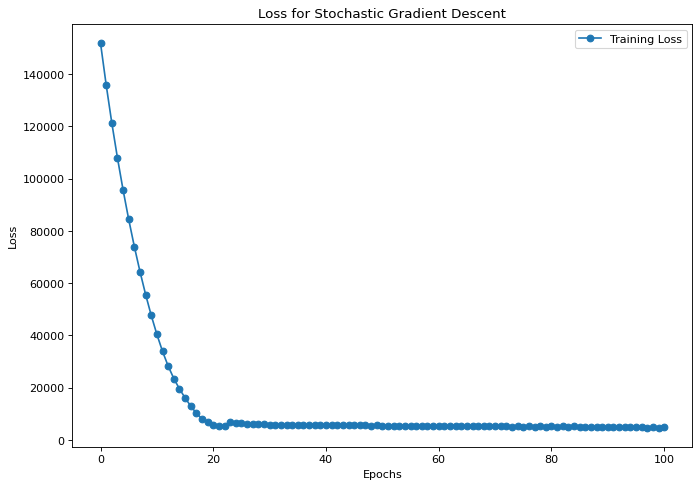

In [83]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 7), dpi=80)

epochs_range = range(epochs+1)

plt.plot(epochs_range, training_loss, '-o', label='Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Loss for Stochastic Gradient Descent')
plt.legend()
plt.savefig('question1_TrainingLoss.png')